# Mushroom Classification Using Different Classifiers
In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc. and is made available by UCI Machine Learning.

# Importing the Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Mushroom.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

Here the dataset is containing 8124 rows and 23 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

here no null value is present in the dataset

In [7]:
#Statistical summary

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


There are 23 columns so all are not getting displayed here. we will check for outliers and skewness seprately in further steps.

Here no null value is present in dataset

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

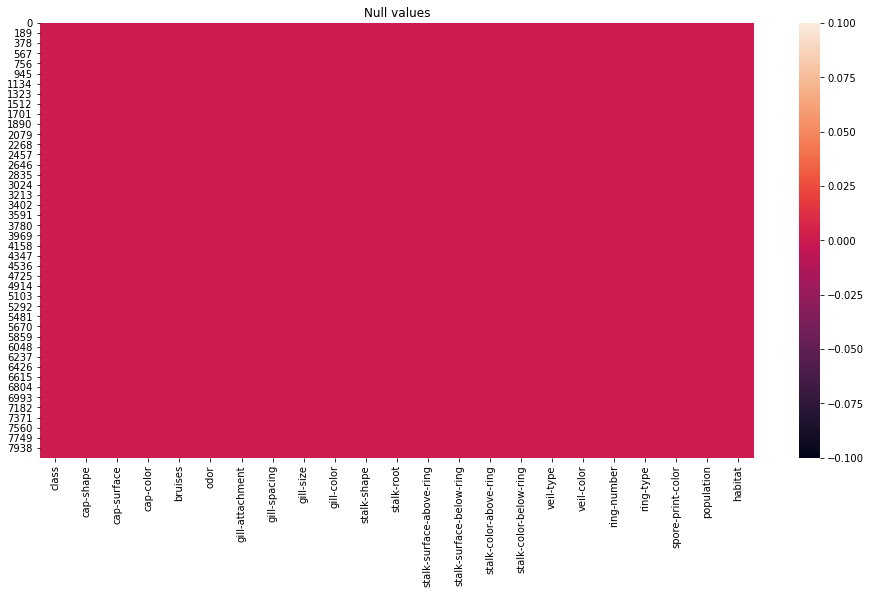

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [9]:
df["class"].value_counts

<bound method IndexOpsMixin.value_counts of 0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object>

In [10]:
df["class"].unique()

array(['p', 'e'], dtype=object)

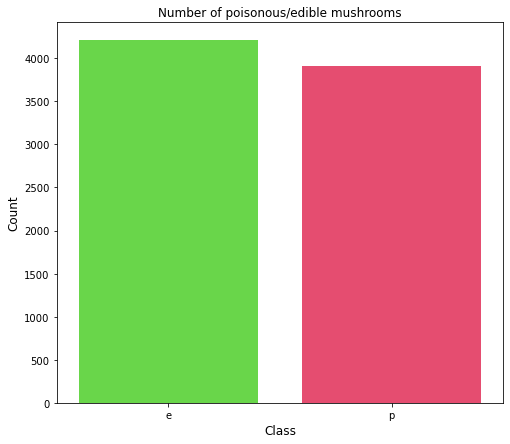

In [11]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

The data set is balanced

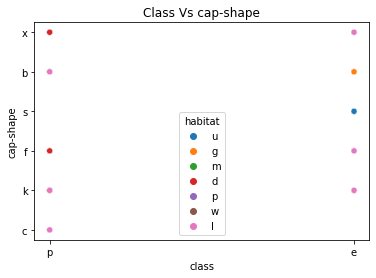

In [13]:
sns.scatterplot(x="class",y="cap-shape",data=df,hue="habitat")
plt.title("Class Vs cap-shape")
plt.show()

In [14]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Checking Correlation

In [16]:
cor=df.corr()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<function matplotlib.pyplot.show(close=None, block=None)>

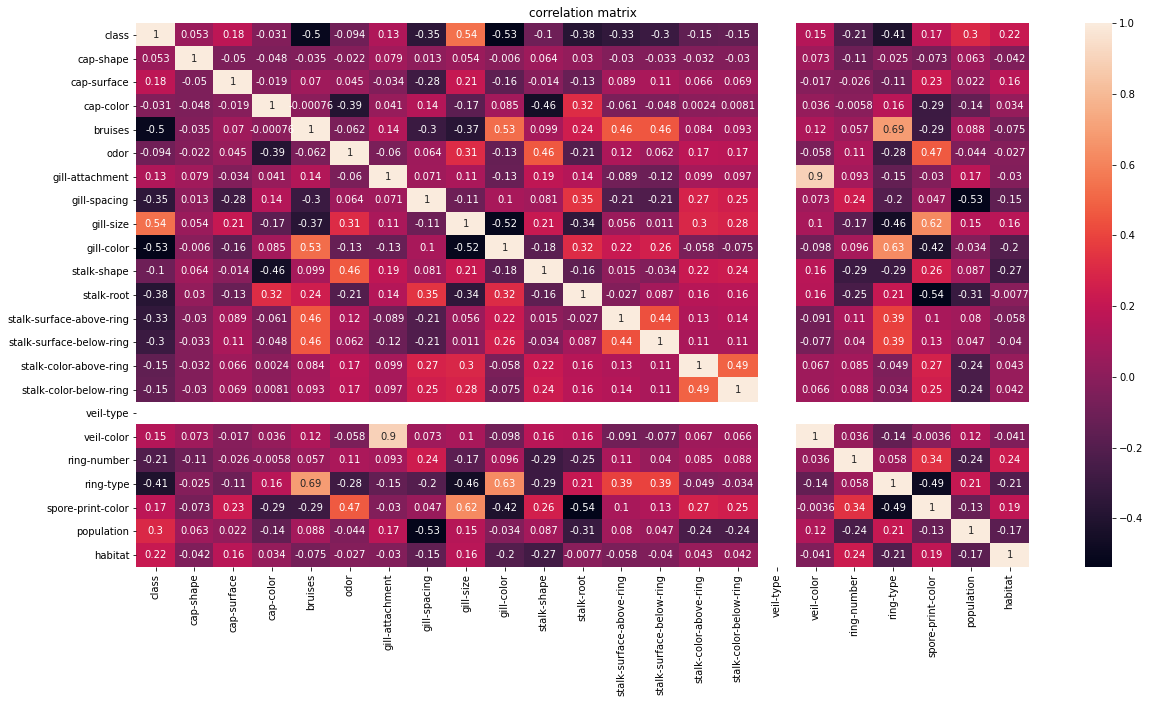

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)
plt.title("correlation matrix")
plt.show

we are unbale to identify the correlation in avove heatmap due to huge number of columns. lets print the correlation values of idependent varaible with target varaible in sorted form

In [19]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [20]:
df.drop(["veil-type"],axis=1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [21]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [22]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [23]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [25]:
df_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-type                   0.000000
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

# Finding the best Random State

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
maxAucc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.9585726004922067 on random_state 21


# Creating Train Test Split

In [29]:
x_train,y_train,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=21)

In [30]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


0.4913863822805578
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1268
           1       0.47      0.47      0.47      1170

    accuracy                           0.49      2438
   macro avg       0.49      0.49      0.49      2438
weighted avg       0.49      0.49      0.49      2438

[[650 618]
 [622 548]]


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.4942575881870386
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1268
           1       0.47      0.48      0.48      1170

    accuracy                           0.49      2438
   macro avg       0.49      0.49      0.49      2438
weighted avg       0.49      0.49      0.49      2438

[[646 622]
 [611 559]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.4942575881870386
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1268
           1       0.47      0.48      0.48      1170

    accuracy                           0.49      2438
   macro avg       0.49      0.49      0.49      2438
weighted avg       0.49      0.49      0.49      2438

[[646 622]
 [611 559]]


In [33]:
from sklearn.svm import SVC
SVC=LogisticRegression()
SVC.fit(x_train,y_train)
pred=SVC.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.4913863822805578
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1268
           1       0.47      0.47      0.47      1170

    accuracy                           0.49      2438
   macro avg       0.49      0.49      0.49      2438
weighted avg       0.49      0.49      0.49      2438

[[650 618]
 [622 548]]


In [34]:
from sklearn.model_selection import cross_val_score

In [36]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.8400878363016295


In [37]:
scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.9138079575596816


In [38]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.9064233421750665


In [39]:
scr=cross_val_score(SVC,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.8400878363016295


Here,Minimum difference in accuracy and cross validation score is for SVC and LogisticClassifier, i would choose LogisticRegression and do hyper_tuning


# Hyper parameter_tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [53]:
#creating parameter list to pass in GridSearchCV

parameters={"C":np.arange(2,15),
           "penalty":["l1", "l2","elasticnet"]}

In [54]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5) #tuning SVC

In [55]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [56]:
GCV.best_params_

{'C': 13, 'penalty': 'l2'}

In [61]:
mod=LogisticRegression(penalty="l2",C=12,random_state=21)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

49.056603773584904


# Saving the Model

In [63]:
import joblib
joblib.dump(mod,"Mushroom.pkl")

['Mushroom.pkl']